In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
import keras
import os

In [3]:
import os
folder_path="C:\\Users\\8902\\Desktop\\fruit data set\\train\\train"
image_size = (180, 180)
batch_size = 128

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    folder_path,
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)


Found 16854 files belonging to 33 classes.
Using 13484 files for training.
Using 3370 files for validation.


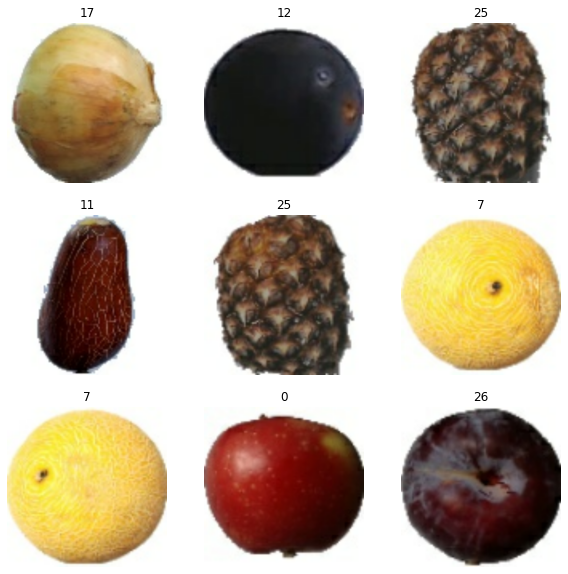

In [4]:
#visualize the data

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [5]:
#Data Augumentation
S=64
from keras.preprocessing.image import ImageDataGenerator
training_set="C:\\Users\\8902\\Desktop\\fruit data set\\train\\train"
test_set="C:\\Users\\8902\\Desktop\\fruit data set\\test\\test"

trainDatagen = ImageDataGenerator(
                    rescale=1./255,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)

testDatagen = ImageDataGenerator(rescale=1./255)

trainDataset = trainDatagen.flow_from_directory(
        training_set,
        target_size=(S, S),
        batch_size=32,
        class_mode='binary')

testDataset = testDatagen.flow_from_directory(
        test_set,
        target_size=(S, S),
        batch_size=32,
        class_mode='binary')

Found 16854 images belonging to 33 classes.
Found 0 images belonging to 0 classes.


In [6]:
#Cnn 
classifier = Sequential()
#1st layer of Convolutional layer
classifier.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(1,1), input_shape=(S,S,3), activation='relu', padding='same'))

#Max pooling -> Reduce the size heat map
#applying max pool to 1st cl to reduce heat map
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2) ))

#Normalization -> Increasing ur learning rate
classifier.add(BatchNormalization())
#Dropout -> TO eliminate overfitting

classifier.add(Dropout(0.2))

In [7]:
#2nd Convolution layer
classifier.add(Convolution2D(filters=16, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.2))

In [8]:
#3rd layer 

classifier.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.2))

In [9]:
#Flattening the Layer 
classifier.add(Flatten())

In [10]:
#Adding fully connected layer
classifier.add(Dense(units=32,activation='relu'))

In [11]:
#output layer
classifier.add(Dense(units=1,activation='sigmoid'))
print(classifier.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 16)       0

In [ ]:
#Compiling with cnn
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#fitting


history = classifier.fit(trainDataset,
                    steps_per_epoch=int(8000/batch_size),
                    epochs=100,
                    validation_data=testDataset,
                    validation_steps=int(2000/batch_size))


Epoch 1/100
62/62 [==============================] - 16s 194ms/step - loss: -951.2958 - accuracy: 0.0252
Epoch 2/100
62/62 [==============================] - 13s 206ms/step - loss: -4678.2856 - accuracy: 0.0353
Epoch 3/100
62/62 [==============================] - 13s 211ms/step - loss: -12430.7324 - accuracy: 0.0282
Epoch 4/100
62/62 [==============================] - 14s 219ms/step - loss: -25874.8691 - accuracy: 0.0277
Epoch 5/100
62/62 [==============================] - 14s 226ms/step - loss: -46374.6016 - accuracy: 0.0237
Epoch 6/100
62/62 [==============================] - 14s 230ms/step - loss: -76184.8984 - accuracy: 0.0277
Epoch 7/100
62/62 [==============================] - 15s 247ms/step - loss: -115998.7969 - accuracy: 0.0312
Epoch 8/100
62/62 [==============================] - 14s 220ms/step - loss: -166768.0781 - accuracy: 0.0272
Epoch 9/100
62/62 [==============================] - 13s 206ms/step - loss: -227653.2656 - accuracy: 0.0312
Epoch 10/100
62/62 [=================

62/62 [==============================] - 12s 186ms/step - loss: -64361112.0000 - accuracy: 0.0252
Epoch 76/100
32/62 [==============>...............] - ETA: 5s - loss: -66947036.0000 - accuracy: 0.0186